In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

In [2]:
sshData = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

Text(0.5, 1.0, 'SVB run')

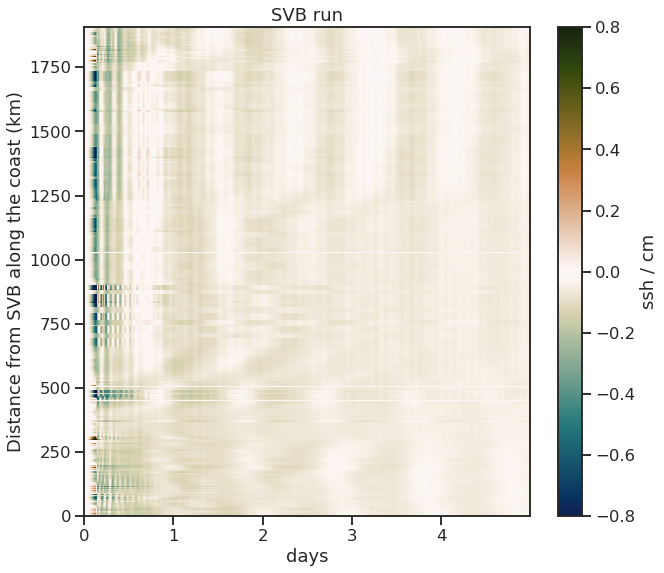

In [3]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose(sshData.curtain_data.data*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run')

In [4]:
sshData

<xarray.Dataset>
Dimensions:       (t: 720, x: 555)
Dimensions without coordinates: t, x
Data variables:
    X             (x) float64 0.0 1.512 3.025 ... 1.903e+03 1.905e+03 1.907e+03
    T             (t) float64 0.0 600.0 1.2e+03 ... 4.308e+05 4.314e+05
    curtain_data  (t, x) float64 2.162e-06 1.747e-06 ... -0.0001504 -0.0002205
Attributes:
    title:        SSH curtain plot data febTS NO SVB
    author:       Karina Ramos Musalem
    institution:  ICACC-UNAM
    source:       /notebooks/MITgcm/domain5/ssh_hovmoller_at_coast_all_points...
    description:  SSH data at points along the coast to build curtain hovmöll...
    timeStamp:    Fri Oct 15 10:34:30 2021

In [5]:
sshData.curtain_data.data

array([[ 2.16197656e-06,  1.74720178e-06,  1.44910090e-06, ...,
         1.05948840e-06,  6.26527252e-07,  1.63984589e-06],
       [ 1.08771099e-05,  8.24948435e-06,  6.27424730e-06, ...,
         1.78935556e-06,  2.25184909e-06,  8.41513507e-06],
       [ 1.88272316e-05,  1.53484321e-05,  1.27348469e-05, ...,
         5.44023283e-06,  5.86550988e-06,  1.91754466e-05],
       ...,
       [-1.51577526e-04, -1.51522612e-04, -1.73285330e-04, ...,
        -1.68926176e-04, -1.75570818e-04, -2.54879067e-04],
       [-1.51854908e-04, -1.51862999e-04, -1.73876312e-04, ...,
        -1.60706236e-04, -1.66656001e-04, -2.34384370e-04],
       [-1.55734368e-04, -1.55734947e-04, -1.77865622e-04, ...,
        -1.43222117e-04, -1.50397511e-04, -2.20519961e-04]])